## 1. Introduction

### 1.1 Background
    Lima is Peru's capital city. The metropolitan area has 43 districts (50 counting Callao Constitutional Province) and it has over 9 million habitants. Over 40% of Peru's urban population lives in Lima and this number grows every year at 1.2%.
    This amount of people require different services as the one of this analysis, restaurants and foods. The restaurants and foods business category has grown every month for the past 23 months, 3.93% in the last year, so it's a good choice for Lima citizens to start a business.
    The objective of this data science project is to show best options between 3 districts (San Isidro, Barranco and Miraflores) to start a restaurant/food business. These districts were chosen as are considered by Lima middle class as common destinations for entertainment and office location.

### 1.2 Data
The data used in this project is the following:
 - 100 food venues in 1 km radius for each district (Miraflores, San Isidro and Barranco).
 - Rating, price tier and quantity of likes for each venue.

All this data was obtained through Foursquare API. An example of the final data is the following:

In [5]:
import pandas as pd
pd.read_csv("prueba.csv").head()

,id,Venue,Venue Latitude,Venue Longitude,Venue Category,Distrito,pricetier,rating,likes
0,4cc2f8474fcfbfb763bbbd24,Lima 27,-12.096252,-77.035084,Peruvian,San Isidro,2,8.7,359
1,56d88b07498effe63b0b746e,Primos Chicken Lovers Bar,-12.098140,-77.036146,Restaurant,San Isidro,2,8.6,140
2,52fbaf6b498eb8a688516643,Astrid y Gastón,-12.096591,-77.034695,Peruvian,San Isidro,3,8.6,526
3,4f15ff95e5e8f419abbd0465,Le Café,-12.097256,-77.037704,Peruvian,Lima,2,9.0,14
4,4bd78d2a88559521c7e387a7,Tanta,-12.096798,-77.035334,Peruvian,San Isidro,2,8.4,422


## 2. Methodology
### 2.1 Libraries
- Pandas and numpy were used for data wrangling and analysis
- Matplotlib was used for graph display.
- Geopy and folium were used for location and displaying data in maps.
- Sklearn for algorithms.

### 2.2 Data analysis and exploration
    The steps taken to obtain the data were:
    - For each district coordinate obtain 100 food venues in a 1km radius.
    - For each venue obtain rating, price tier and likes.
    
    Example code for one district:
    
```python
radius=1000
LIMIT=500
lat=latitudeBA
lng=longitudeBA
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06374d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
# Obtaining venues
results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list=[]
venues_list.append([(
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue'].get("location").get("city")) for v in results])
nearby_venuesBA = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venuesBA.columns = ['id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Distrito']

venuedetails=[]
#Obtaining details
for id in nearby_venuesBA["id"]:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id,CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()["response"]
    price=-1
    rating=-1
    if "price" in results["venue"]:
        price=results["venue"]["price"]["tier"]
    if "rating" in results["venue"]:
        rating=results["venue"]["rating"]
   
    venuedetails.append([
            id,
            price, 
            rating, 
            results["venue"]["likes"]["count"]])
detailsBA=pd.DataFrame(venuedetails)
detailsBA.columns=["id","pricetier","rating","likes"]
detailsBA.to_csv("detallesBA.csv")

venuesBA=nearby_venuesBA.merge(detailsBA)
venuesBA["Venue Category"]=venuesBA["Venue Category"].str.replace(" Restaurant","")
```
    After data was loaded and cleaned, summaries were obtained to give a general glimpse:
    
    

In [47]:
import pandas as pd
import numpy as np
#!conda install -c conda-forge folium=0.5.0 --yes
#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge scikit-learn --yes

from geopy.geocoders import Nominatim
import folium
import requests # library to handle requests
from pandas.io.json import json_normalize 

address = 'San Isidro, PE'

geolocator = Nominatim(user_agent="pe_explorer")
location = geolocator.geocode(address)
latitudeSI = location.latitude
longitudeSI = location.longitude

address = 'Miraflores, PE'
location = geolocator.geocode(address)
latitudeMI = location.latitude
longitudeMI = location.longitude


address = 'Barranco, PE'
location = geolocator.geocode(address)
latitudeBA = location.latitude
longitudeBA = location.longitude

# @hidden_cell
CLIENT_ID = 'FIECQYONEVP4KPHBVPPNAQBEGQNMI5OXCQXRLBZULHIQXGRN' # your Foursquare ID
CLIENT_SECRET = 'ZNHYYGDWWKADFEFQMXQBOTFR44I0FV12NKULW2CKD1Z5LLG0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version



radius=1000
LIMIT=500
lat=latitudeBA
lng=longitudeBA
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06374d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list=[]
venues_list.append([(
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue'].get("location").get("city")) for v in results])
nearby_venuesBA = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venuesBA.columns = ['id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Distrito']
nearby_venuesBA.head()
detailsBA=pd.read_csv("detallesBA.csv")
detailsBA

lat=latitudeMI
lng=longitudeMI
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06374d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list=[]
venues_list.append([(
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue'].get("location").get("city")) for v in results])
nearby_venuesMI = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venuesMI.columns = ['id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Distrito']
nearby_venuesMI.head()

detailsMI=pd.read_csv("detallesMI.csv")
detailsMI.head()

lat=latitudeSI
lng=longitudeSI
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06374d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list=[]
venues_list.append([(
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue'].get("location").get("city")) for v in results])
nearby_venuesSI = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venuesSI.columns = ['id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Distrito']
nearby_venuesSI.head()

detailsSI=pd.read_csv("detallesSI.csv")
detailsSI.head()

venuesSI=nearby_venuesSI.merge(detailsSI)
venuesMI=nearby_venuesMI.merge(detailsMI)
venuesBA=nearby_venuesBA.merge(detailsBA)

venuesSI["Venue Category"]=venuesSI["Venue Category"].str.replace(" Restaurant","")
venuesMI["Venue Category"]=venuesMI["Venue Category"].str.replace(" Restaurant","")
venuesBA["Venue Category"]=venuesBA["Venue Category"].str.replace(" Restaurant","")



venuesSI.loc[venuesSI["pricetier"]==-1,"pricetier"]=round(venuesSI["pricetier"].mean())
venuesMI.loc[venuesMI["pricetier"]==-1,"pricetier"]=round(venuesMI["pricetier"].mean())
venuesBA.loc[venuesBA["pricetier"]==-1,"pricetier"]=round(venuesBA["pricetier"].mean())

### *San Isidro district*

In [48]:
venuesSI[["pricetier","rating","likes","Venue Category"]].describe(include="all")

,pricetier,rating,likes,Venue Category
count,100.00000,100.00000,100.000000,100
unique,NaN,NaN,NaN,29
top,NaN,NaN,NaN,Peruvian
freq,NaN,NaN,NaN,14
mean,1.88000,7.73500,87.020000,NaN
std,0.80754,0.62286,117.004099,NaN
min,1.00000,6.50000,5.000000,NaN
25%,1.00000,7.20000,11.750000,NaN
50%,2.00000,7.70000,40.500000,NaN
75%,2.00000,8.20000,99.000000,NaN


### *Miraflores district*

In [49]:
venuesMI[["pricetier","rating","likes","Venue Category"]].describe(include="all")

,pricetier,rating,likes,Venue Category
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,36
top,NaN,NaN,NaN,Peruvian
freq,NaN,NaN,NaN,13
mean,1.780000,8.067000,133.740000,NaN
std,0.690191,0.503333,203.997208,NaN
min,1.000000,6.900000,4.000000,NaN
25%,1.000000,7.700000,23.000000,NaN
50%,2.000000,8.000000,53.500000,NaN
75%,2.000000,8.400000,149.750000,NaN


### *Barranco district*

In [50]:
venuesBA[["pricetier","rating","likes","Venue Category"]].describe(include="all")

,pricetier,rating,likes,Venue Category
count,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,33
top,NaN,NaN,NaN,Peruvian
freq,NaN,NaN,NaN,12
mean,1.717172,7.354545,85.383838,NaN
std,0.756474,1.457442,147.167661,NaN
min,1.000000,-1.000000,0.000000,NaN
25%,1.000000,6.950000,9.500000,NaN
50%,2.000000,7.500000,27.000000,NaN
75%,2.000000,8.150000,106.000000,NaN


    We can see that Miraflores district has a little higher price tier, around the same average rating as Barranco and the most average likes. All three districts has Peruvian food as top category.
    Now we visualize the columns for further insights.

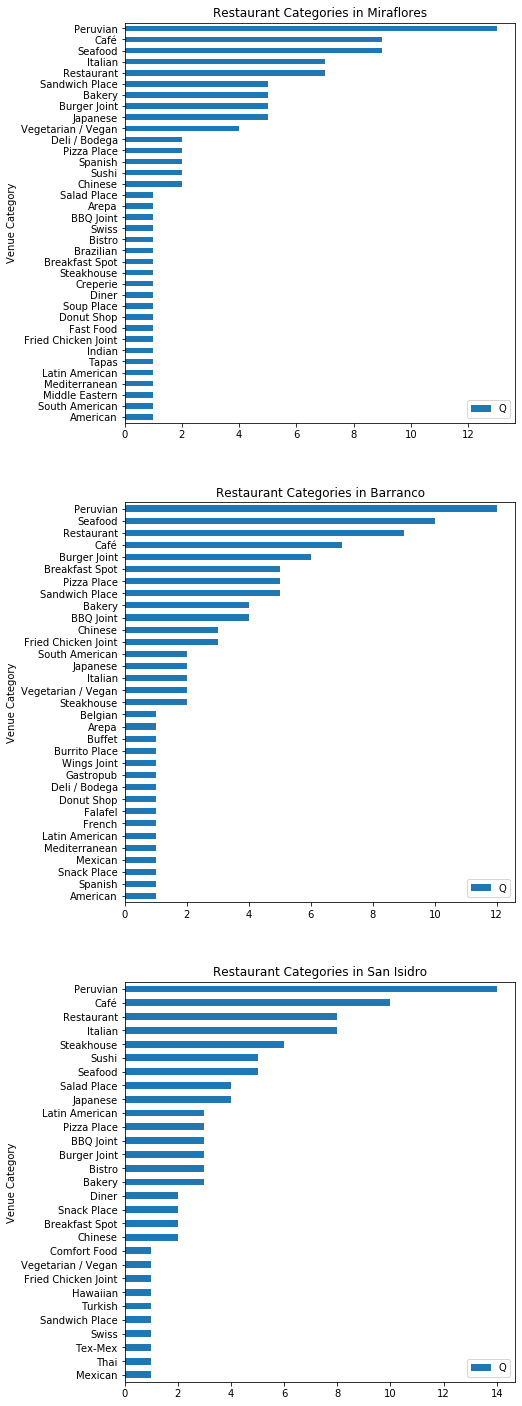

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,25)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(3, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(3, 1, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(3, 1, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


pd.DataFrame(venuesBA.groupby("Venue Category")["id"].count()).sort_values("id",ascending=True).plot(kind="barh",ax=ax1)
ax1.set_title("Restaurant Categories in Barranco")
ax1.legend(['Q'])

pd.DataFrame(venuesMI.groupby("Venue Category")["id"].count()).sort_values("id",ascending=True).plot(kind="barh",ax=ax0)
ax0.set_title("Restaurant Categories in Miraflores")
ax0.legend(['Q'])

pd.DataFrame(venuesSI.groupby("Venue Category")["id"].count()).sort_values("id",ascending=True).plot(kind="barh",ax=ax2)
ax2.set_title("Restaurant Categories in San Isidro")
ax2.legend(['Q'])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()


    Peruvian food is the top category and the second in quantity is Café in 2 districts (San Isidro and Barranco).

Text(0.5, 1.0, 'San Isidro price tier')

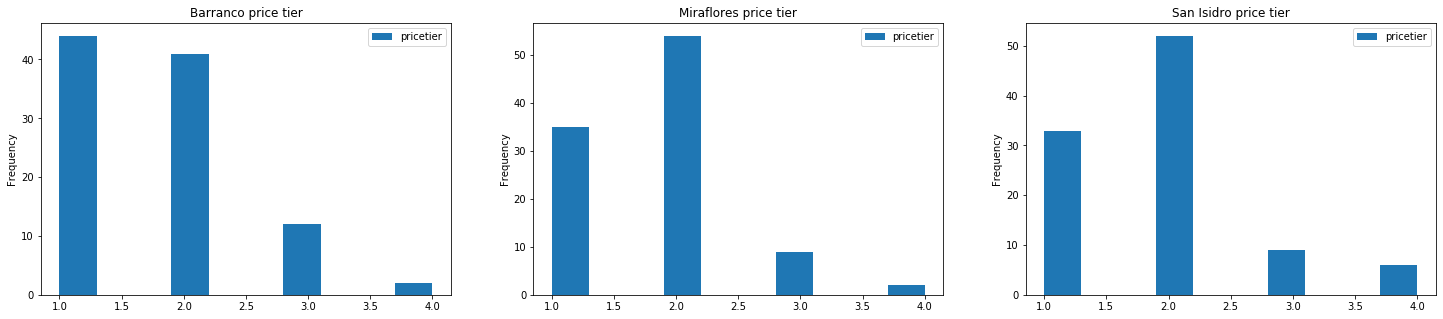

In [52]:
fig = plt.figure(figsize=(25,5)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

venuesBA[["pricetier"]].plot(kind="hist",ax=ax0)
ax0.set_title("Barranco price tier")
venuesMI[["pricetier"]].plot(kind="hist",ax=ax1)
ax1.set_title("Miraflores price tier")
venuesSI[["pricetier"]].plot(kind="hist",ax=ax2)
ax2.set_title("San Isidro price tier")


    Miraflores and San Isidro have similar price tiers and Barranco tends to be cheaper.

Text(0.5, 1.0, 'San Isidro Ratings')

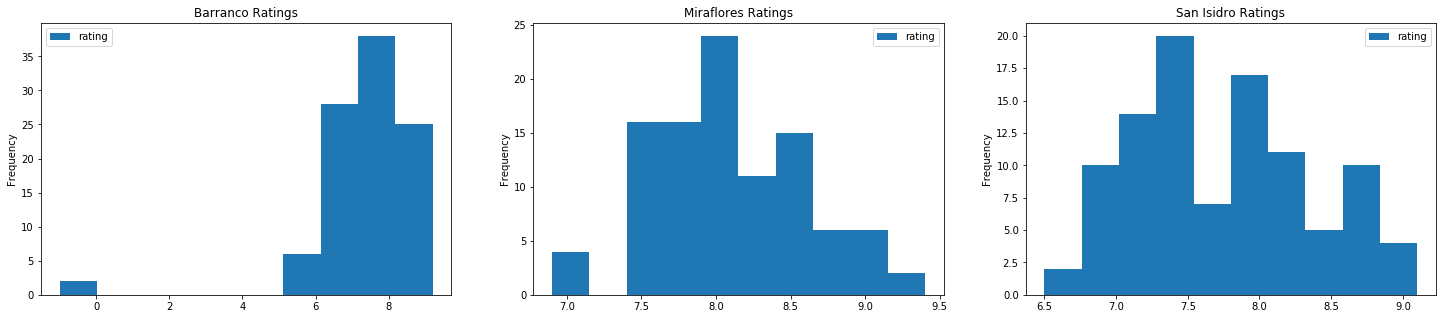

In [53]:
fig = plt.figure(figsize=(25,5)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
venuesBA[["rating"]].plot(kind="hist",ax=ax0)
ax0.set_title("Barranco Ratings")
venuesMI[["rating"]].plot(kind="hist",ax=ax1)
ax1.set_title("Miraflores Ratings")
venuesSI[["rating"]].plot(kind="hist",ax=ax2)
ax2.set_title("San Isidro Ratings")


    Miraflores has more ratings above 7 while Barranco tends to have lower ratings.

Text(0.5, 1.0, 'San Isidro Likes')

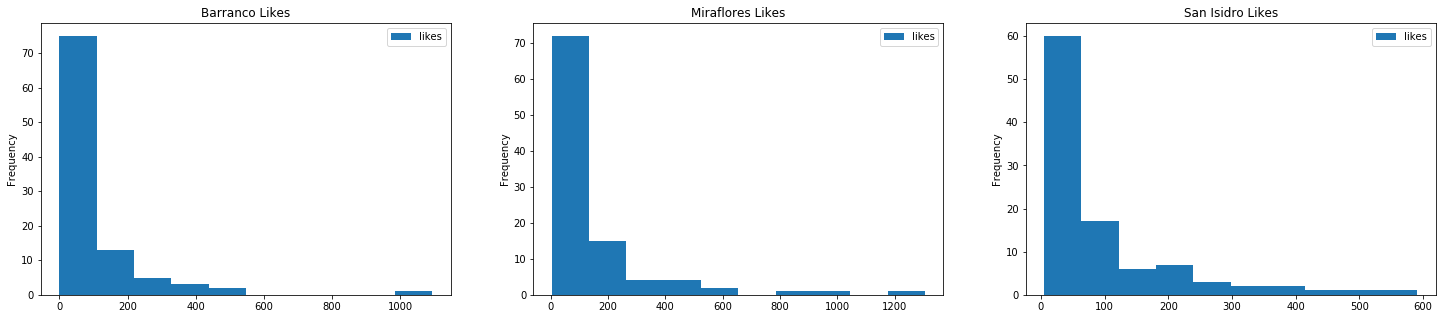

In [54]:
fig = plt.figure(figsize=(25,5)) # create figure

ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
venuesBA[["likes"]].plot(kind="hist",ax=ax0)
ax0.set_title("Barranco Likes")
venuesMI[["likes"]].plot(kind="hist",ax=ax1)
ax1.set_title("Miraflores Likes")
venuesSI[["likes"]].plot(kind="hist",ax=ax2)
ax2.set_title("San Isidro Likes")


    Barranco a Miraflores has similar quantity of likes around 0 to 200, while San Isidro has less.

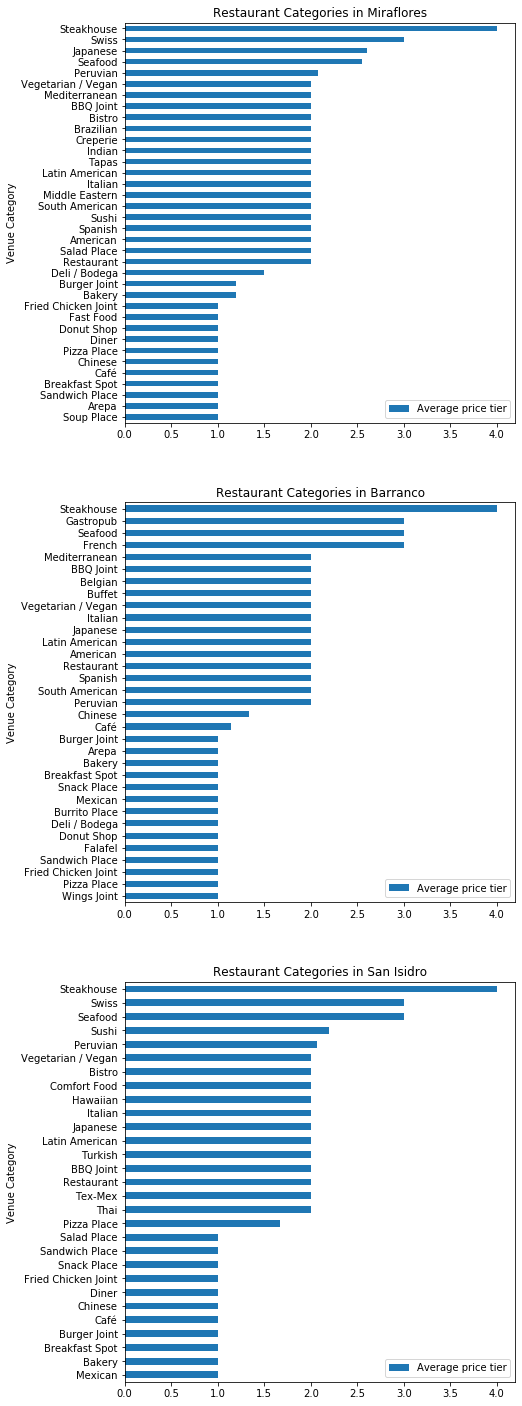

In [100]:
fig = plt.figure(figsize=(7,25)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(3, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(3, 1, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(3, 1, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


pd.DataFrame(venuesBA.groupby("Venue Category")["pricetier"].mean()).sort_values("pricetier",ascending=True).plot(kind="barh",ax=ax1)
ax1.set_title("Restaurant Categories in Barranco")
ax1.legend(['Average price tier'])

pd.DataFrame(venuesMI.groupby("Venue Category")["pricetier"].mean()).sort_values("pricetier",ascending=True).plot(kind="barh",ax=ax0)
ax0.set_title("Restaurant Categories in Miraflores")
ax0.legend(['Average price tier'])

pd.DataFrame(venuesSI.groupby("Venue Category")["pricetier"].mean()).sort_values("pricetier",ascending=True).plot(kind="barh",ax=ax2)
ax2.set_title("Restaurant Categories in San Isidro")
ax2.legend(['Average price tier'])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()

    Steak house and swiss food categories tend to be more expensive.
    
### 2.3 Clustering

    As an approach to solve the proposed problem, clustering is gonna be used to identify in each district different food business oportunities. The algorithm selected is DBSCAN (an unsupervised algorithm based in density). Given our data we are gonna use a min sample of 5.
    And we use nearest neighbors algorith to find the optimal epsilon with the code below. Epsilon is chosen with the point of maximum curvature[1].
```python
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Clus_dataSet_SI)
distances, indices = nbrs.kneighbors(Clus_dataSet_SI)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
```

In [109]:
import sklearn
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
MI_onehot = pd.get_dummies(venuesMI[['Venue Category']], prefix="", prefix_sep="")
MI_onehot['rating']=venuesMI['rating']
MI_onehot['likes']=venuesMI['likes']
MI_onehot['pricetier']=venuesMI['pricetier']
sklearn.utils.check_random_state(1000)
Clus_dataSet = MI_onehot
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet_MI=Clus_dataSet

# Compute DBSCAN
db = DBSCAN(eps=2, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
venuesMI["Clus_Db"]=labels

BA_onehot = pd.get_dummies(venuesBA[['Venue Category']], prefix="", prefix_sep="")
BA_onehot['rating']=venuesBA['rating']
BA_onehot['likes']=venuesBA['likes']
BA_onehot['pricetier']=venuesBA['pricetier']
sklearn.utils.check_random_state(1000)
Clus_dataSet = BA_onehot
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet_BA=Clus_dataSet
# Compute DBSCAN
db = DBSCAN(eps=1.8, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
venuesBA["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

SI_onehot = pd.get_dummies(venuesSI[['Venue Category']], prefix="", prefix_sep="")
SI_onehot['rating']=venuesSI['rating']
SI_onehot['likes']=venuesSI['likes']
SI_onehot['pricetier']=venuesSI['pricetier']
sklearn.utils.check_random_state(1000)
Clus_dataSet = SI_onehot
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet_SI=Clus_dataSet
# Compute DBSCAN
db = DBSCAN(eps=2.5, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
venuesSI["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

Text(0.5, 1.0, 'Barranco')

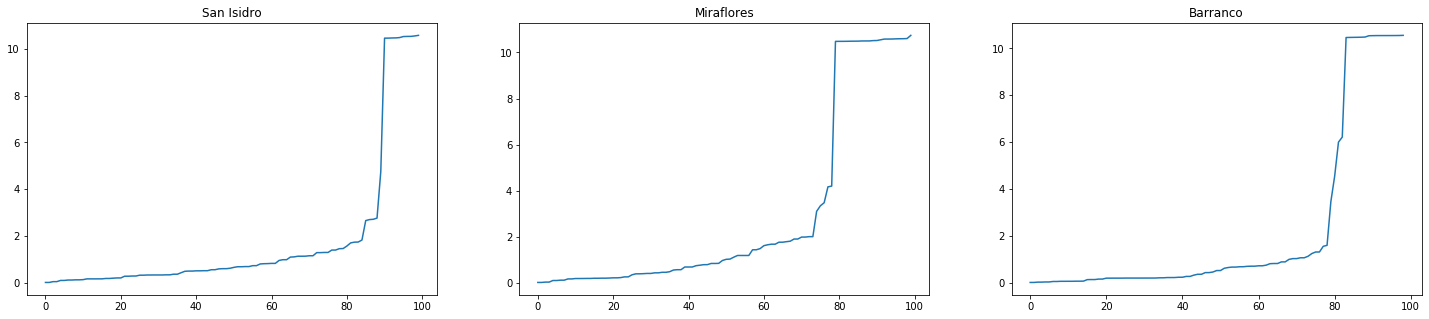

In [110]:
from sklearn.neighbors import NearestNeighbors
fig = plt.figure(figsize=(25,5)) # create figure

ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)


neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Clus_dataSet_SI)
distances, indices = nbrs.kneighbors(Clus_dataSet_SI)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax0.plot(distances)
ax0.set_title("San Isidro")
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Clus_dataSet_MI)
distances, indices = nbrs.kneighbors(Clus_dataSet_MI)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax1.plot(distances)
ax1.set_title("Miraflores")

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Clus_dataSet_BA)
distances, indices = nbrs.kneighbors(Clus_dataSet_BA)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax2.plot(distances)
ax2.set_title("Barranco")


    After analizing the graphs, epsilon 2, 1.8 and 2.5 were chosen for Miraflores, Barranco and San Isidro districts respectively. Now it's time to apply the algorithm. An example of the code for one district is the following:
```python
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
MI_onehot = pd.get_dummies(venuesMI[['Venue Category']], prefix="", prefix_sep="")
MI_onehot['rating']=venuesMI['rating']
MI_onehot['likes']=venuesMI['likes']
MI_onehot['pricetier']=venuesMI['pricetier']
sklearn.utils.check_random_state(1000)
Clus_dataSet = MI_onehot
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=2, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
venuesMI["Clus_Db"]=labels
```
    A summary of the results for each district:

### *Miraflores*

In [112]:
summaryClustersMI=[]
for clus in set(venuesMI.Clus_Db):
    if clus!=-1:
        x=venuesMI[venuesMI.Clus_Db==clus][["pricetier","Venue Category","rating","likes"]].describe(include="all")
        
        
        topCategory=x.loc["top"]["Venue Category"]
        means=x.loc["mean",["pricetier","rating","likes"]]
        q=x.loc["count"][0]
        pricetier=means[0]
        rating=means[1]
        likes=means[2]
        summaryClustersMI.append([topCategory,pricetier,rating,likes,clus,q])

summaryClustersMIdf=pd.DataFrame(summaryClustersMI)
summaryClustersMIdf.columns=["Top Category","Avg Price Tier","Avg Rating","Avg Likes","Cluster","Quantity"]
summaryClustersMIdf

,Top Category,Avg Price Tier,Avg Rating,Avg Likes,Cluster,Quantity
0,Peruvian,2.083333,8.091667,186.583333,0,12.0
1,Café,1.000000,7.888889,82.000000,1,9.0
2,Seafood,2.625000,8.150000,49.750000,2,8.0
3,Restaurant,2.000000,7.971429,12.571429,3,7.0
4,Italian,2.000000,8.114286,102.714286,4,7.0
5,Sandwich Place,1.000000,8.120000,58.200000,5,5.0


In [113]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitudeMI, longitudeMI], zoom_start=15)

# set color scheme for the clusters
x = np.arange(len(set(venuesMI["Clus_Db"])))
ys = [i + x + (i*x)**2 for i in range(len(set(venuesMI["Clus_Db"])))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(venuesMI['Venue Latitude'], venuesMI['Venue Longitude'], venuesMI['Clus_Db']):
    label = folium.Popup( ' Cluster ' + str(cluster), parse_html=True)
    c=(("#C8C8C8") if cluster == -1 else rainbow[cluster-1])
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=c,
        fill=True,
        fill_color=c,
        fill_opacity=0.7).add_to(map_clusters)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Miraflores clusters</b></h3>
             '''
map_clusters.get_root().html.add_child(folium.Element(title_html))
map_clusters

### *Barranco*

In [105]:
summaryClustersBA=[]
for clus in set(venuesBA.Clus_Db):
    if clus!=-1:
        x=venuesBA[venuesBA.Clus_Db==clus][["pricetier","Venue Category","rating","likes"]].describe(include="all")
        
        
        topCategory=x.loc["top"]["Venue Category"]
        means=x.loc["mean",["pricetier","rating","likes"]]
        q=x.loc["count"][0]
        pricetier=means[0]
        rating=means[1]
        likes=means[2]
        summaryClustersBA.append([topCategory,pricetier,rating,likes,clus,q])

summaryClustersBAdf=pd.DataFrame(summaryClustersBA)
summaryClustersBAdf.columns=["Top Category","Avg Price Tier","Avg Rating","Avg Likes","Cluster","Quantity"]
summaryClustersBAdf

,Top Category,Avg Price Tier,Avg Rating,Avg Likes,Cluster,Quantity
0,Seafood,3.000000,7.740000,97.300000,0,10.0
1,Sandwich Place,1.000000,7.480000,57.000000,1,5.0
2,Restaurant,2.000000,7.862500,38.750000,2,8.0
3,Burger Joint,1.000000,7.500000,18.666667,3,6.0
4,Peruvian,2.000000,7.600000,160.500000,4,12.0
5,Café,1.166667,7.366667,91.666667,5,6.0
6,Breakfast Spot,1.000000,7.120000,6.800000,6,5.0
7,Pizza Place,1.000000,6.960000,17.200000,7,5.0


In [115]:
map_clusters = folium.Map(location=[latitudeBA, longitudeBA], zoom_start=15)

# set color scheme for the clusters
x = np.arange(len(set(venuesBA["Clus_Db"])))
ys = [i + x + (i*x)**2 for i in range(len(set(venuesBA["Clus_Db"])))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(venuesBA['Venue Latitude'], venuesBA['Venue Longitude'], venuesBA['Clus_Db']):
    label = folium.Popup( ' Cluster ' + str(cluster), parse_html=True)
    c=(("#C8C8C8") if cluster == -1 else rainbow[cluster-1])
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=c,
        fill=True,
        fill_color=c,
        fill_opacity=0.7).add_to(map_clusters)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Barranco clusters</b></h3>
             '''       
map_clusters.get_root().html.add_child(folium.Element(title_html))
map_clusters

### *San Isidro*

In [107]:
summaryClustersSI=[]
for clus in set(venuesSI.Clus_Db):
    if clus!=-1:
        x=venuesSI[venuesSI.Clus_Db==clus][["pricetier","Venue Category","rating","likes"]].describe(include="all")
        
        
        topCategory=x.loc["top"]["Venue Category"]
        means=x.loc["mean",["pricetier","rating","likes"]]
        q=x.loc["count"][0]
        pricetier=means[0]
        rating=means[1]
        likes=means[2]
        summaryClustersSI.append([topCategory,pricetier,rating,likes,clus,q])

summaryClustersSIdf=pd.DataFrame(summaryClustersSI)
summaryClustersSIdf.columns=["Top Category","Avg Price Tier","Avg Rating","Avg Likes","Cluster","Quantity"]
summaryClustersSIdf

,Top Category,Avg Price Tier,Avg Rating,Avg Likes,Cluster,Quantity
0,Peruvian,2.0,7.881818,31.181818,0,11.0
1,Steakhouse,4.0,8.100000,130.166667,1,6.0
2,Café,1.0,7.750000,52.400000,2,10.0
3,Italian,2.0,7.912500,101.625000,3,8.0
4,Restaurant,2.0,7.587500,46.875000,4,8.0
5,Seafood,3.0,7.520000,81.600000,5,5.0


In [117]:
map_clusters = folium.Map(location=[latitudeSI, longitudeSI], zoom_start=15)

# set color scheme for the clusters
x = np.arange(len(set(venuesSI["Clus_Db"])))
ys = [i + x + (i*x)**2 for i in range(len(set(venuesSI["Clus_Db"])))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(venuesSI['Venue Latitude'], venuesSI['Venue Longitude'], venuesSI['Clus_Db']):
    label = folium.Popup( ' Cluster ' + str(cluster), parse_html=True)
    c=(("#C8C8C8") if cluster == -1 else rainbow[cluster-1])
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=c,
        fill=True,
        fill_color=c,
        fill_opacity=0.7).add_to(map_clusters)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>San Isidro clusters</b></h3>
             '''       
map_clusters.get_root().html.add_child(folium.Element(title_html))       
map_clusters

## 3. Discussion
    After applying the clustering for each district we obtain different clusters with varying food categories, price tiers, ratings and likes in Foursquare. Also we can visualize these clusters in the map thanks to Folium library. With these tools the entrepreneur can select a cluster/food category according to the price he/she would like to set and can opt to establish the business near or far to similar members of the cluster in each district. Also he can get and idea of how popular/unpopular similar venues  are in Foursquare as an indicator of future popularity.

## 4. Conclussion
    This analysis can be used by entrepreneurs to choose the district in which they want to open a venue according to the category, price and popularity of their preference. Further analysis can be done with more capabilities beyond the free tier of the Foursquare API and expand the number of venues and attributes analyzed or by choosing districts for other segments of Lima Metropolitan population.

## 5. References

    [1] https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf